In [22]:
# !pip install pycaret

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pycaret.classification import *


In [24]:
# Load the dataset
data = pd.read_csv('/content/Sensor Data.csv')

# Inspect the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Freq [GHz]   2002 non-null   float64
 1   S12 Mag      2002 non-null   float64
 2   S13 Mag      2002 non-null   float64
 3   S14 Mag      2002 non-null   float64
 4   S23 Mag      2002 non-null   float64
 5   S24 Mag      2002 non-null   float64
 6   S34 Mag      2002 non-null   float64
 7   S12 Phase    2002 non-null   float64
 8   S13 Phase    2002 non-null   float64
 9   S14 Phase    2002 non-null   float64
 10  S23 Phase    2002 non-null   float64
 11  S24 Phase    2002 non-null   float64
 12  S34 Phase    2002 non-null   float64
 13  S11 Mag      2002 non-null   float64
 14  S22 Mag      2002 non-null   float64
 15  S33 Mag      2002 non-null   float64
 16  S44 Mag      2002 non-null   float64
 17  S11 Phase    2002 non-null   float64
 18  S22 Phase    2002 non-null   float64
 19  S33 Ph

Missing values per column:
 Freq [GHz]        0
S12 Mag           0
S13 Mag           0
S14 Mag           0
S23 Mag           0
S24 Mag           0
S34 Mag           0
S12 Phase         0
S13 Phase         0
S14 Phase         0
S23 Phase         0
S24 Phase         0
S34 Phase         0
S11 Mag           0
S22 Mag           0
S33 Mag           0
S44 Mag           0
S11 Phase         0
S22 Phase         0
S33 Phase         0
S44 Phase         0
Unnamed: 21    2002
Size              0
dtype: int64
Size
20    1001
0     1001
Name: count, dtype: int64


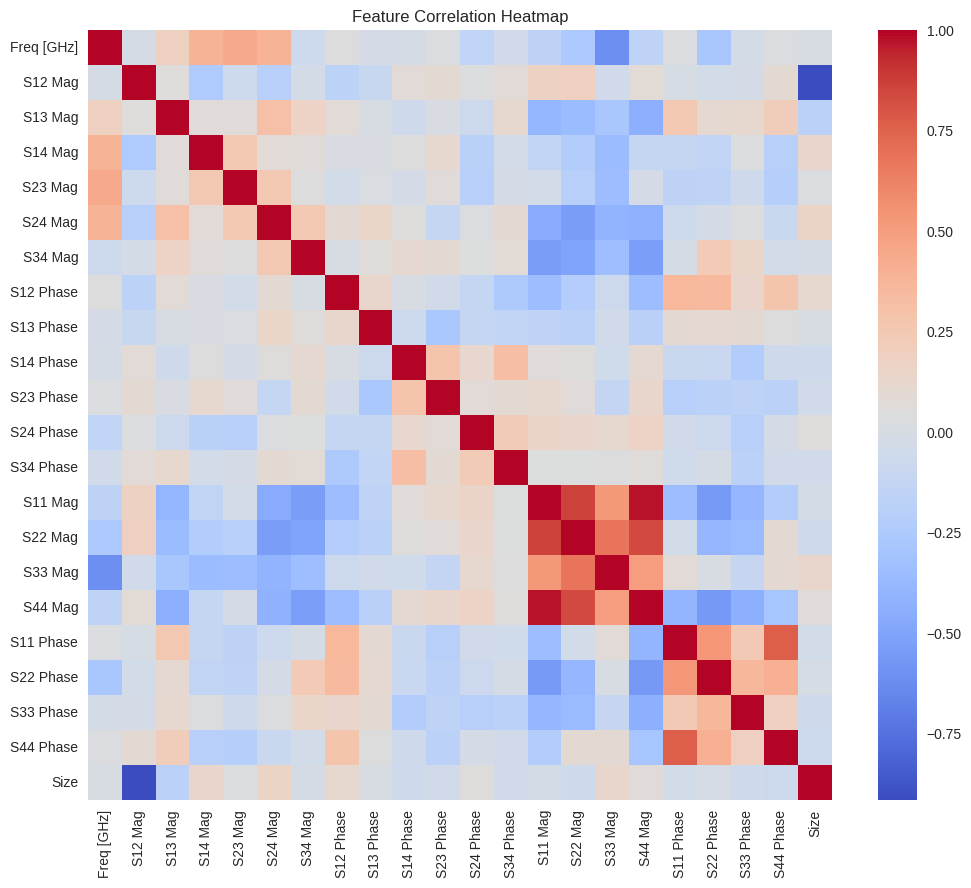

In [25]:
# Step 1: Dataset Analysis and Preprocessing

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Handle duplicates
data.drop_duplicates(inplace=True)

# Drop empty column
data = data.drop(columns=['Unnamed: 21'])

# Check for class imbalance
print(data['Size'].value_counts())

# Normalize feature columns
feature_columns = data.columns[:-1]  # All columns except 'Size'
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
# Split data into features and target
X = data[feature_columns]
y = data['Size']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4934 - loss: 0.7574 - val_accuracy: 0.5763 - val_loss: 0.6820
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5260 - loss: 0.7050 - val_accuracy: 0.6106 - val_loss: 0.6569
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5532 - loss: 0.6819 - val_accuracy: 0.6293 - val_loss: 0.6360
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6038 - loss: 0.6533 - val_accuracy: 0.6636 - val_loss: 0.6183
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6351 - loss: 0.6342 - val_accuracy: 0.6947 - val_loss: 0.6028
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.6212 - val_accuracy: 0.7196 - val_loss: 0.5889
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7078 - loss: 0.5935 - val_accuracy: 0.7601 - val_loss: 0.5761
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7641 - loss: 0.5698 - val_accuracy: 0.8193 - val_loss:

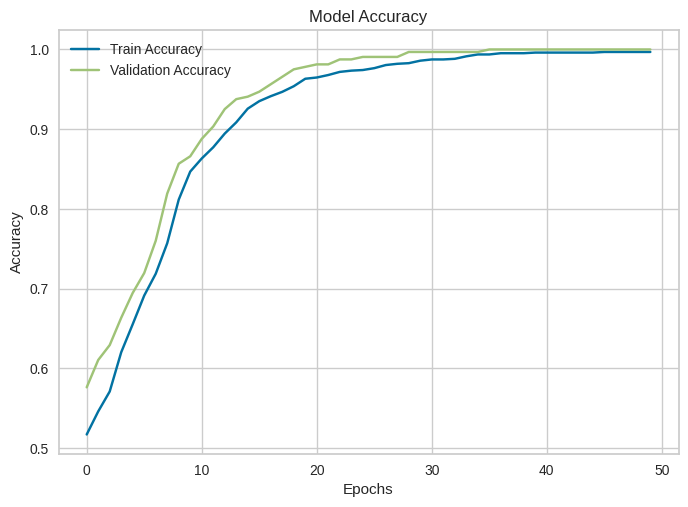

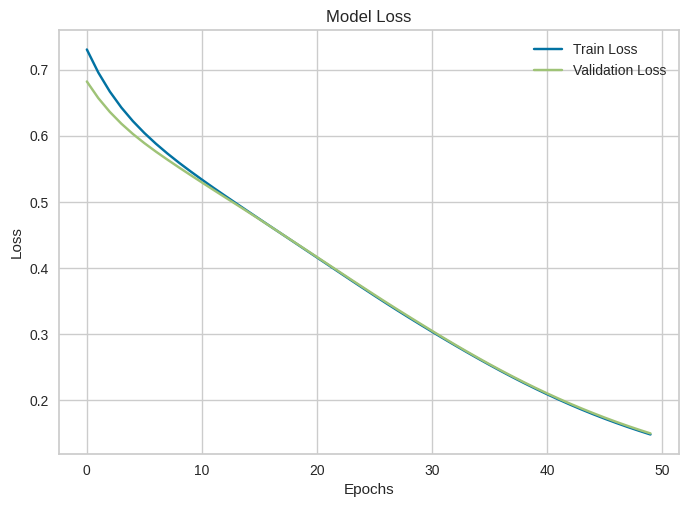

In [30]:

# Step 2: Neural Network Model Design
# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Fix labels: Convert '20' to 1 and '0' stays as 0
y_train_binary = (y_train == 20).astype(int)
y_test_binary = (y_test == 20).astype(int)


# Train the model
history = model.fit(X_train, y_train_binary, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Predict
pred_probs = model.predict(X_test)
predictions = (pred_probs > 0.5).astype(int)

# Accuracy and F1 Score
accuracy = accuracy_score(y_test_binary, predictions)
f1 = f1_score(y_test_binary, predictions)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, predictions))
print("Classification Report:\n", classification_report(y_test_binary, predictions))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Step 3: Experimentation with PyCaret
# Initialize PyCaret
data['Size'] = data['Size'].astype('category')  # Ensure target column is categorical

clf = setup(data=data, target='Size', verbose=False, session_id=42)

# Compare models
best_model = compare_models()

# Finalize the best model
final_model = finalize_model(best_model)

# Evaluate the model
pycaret_predictions = predict_model(final_model)
print(pycaret_predictions)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8450
svm,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0500
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3910
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5520
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4270
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1110
lightgbm,Light Gradient Boosting Machine,0.9993,1.0000,0.9993,0.9993,0.9993,0.9986,0.9986,1.6830
knn,K Neighbors Classifier,0.9986,0.9993,0.9986,0.9986,0.9986,0.9972,0.9972,0.0640
dt,Decision Tree Classifier,0.9986,0.9986,0.9986,0.9986,0.9986,0.9972,0.9972,0.0530
ridge,Ridge Classifier,0.9979,1.0000,0.9979,0.9979,0.9979,0.9957,0.9957,0.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


      Freq [GHz]   S12 Mag   S13 Mag   S14 Mag   S23 Mag   S24 Mag   S34 Mag  \
1151   -1.211225  1.320155  0.299703 -0.479892 -3.358213  0.369677 -0.444315   
1385   -0.401435 -0.563461  1.232815  0.835747  0.757946 -0.105691  0.728350   
1053   -1.550368  1.388916 -1.303087 -1.705258  0.355583 -0.947977 -1.155119   
816     1.093563 -0.442193 -0.527842 -0.003946  0.100746  0.929520 -1.781881   
929     1.484616 -1.270776  0.619892  0.849310  0.902401  1.295820 -0.064930   
...          ...       ...       ...       ...       ...       ...       ...   
1643    0.491411  1.023134  0.702960  0.513716  0.377288 -1.353917 -1.325653   
1861    1.245831  1.171562 -0.306376  0.325523  0.552864 -0.144131  0.194469   
690     0.657522 -0.995947  0.798553  0.108608 -0.038762  0.002809 -1.018999   
500     0.000000 -1.056961  0.258421 -1.087345 -0.427146  0.407338  0.549246   
193    -1.062417 -0.464105 -2.164657  0.165955 -2.141798 -0.300031  0.805780   

      S12 Phase  S13 Phase  S14 Phase  